In [5]:
import numpy as np
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt

In [7]:
def f(x):
    return np.power(x, 2) + 4 * np.sin(x) - 2

In [8]:
a = 10

In [9]:
x = np.arange(-a, a, 0.001, np.float)

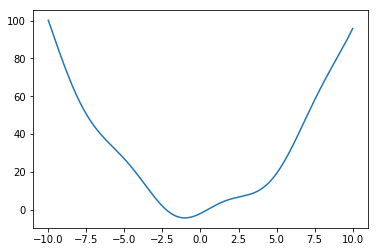

In [10]:
plt.plot(x, f(x))